In [26]:
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
Urban= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/Integrating-GIS-RemoteSensing-ML-for-monitoring-urban-expansion/Parallel_Coordinate_Sample_Data/MOSAIC_Luanda_2018_L8/6543_L8_bands_Parallel_Coordinate/Urban_parallel_coord.tif")
Bareland= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/Integrating-GIS-RemoteSensing-ML-for-monitoring-urban-expansion/Parallel_Coordinate_Sample_Data/MOSAIC_Luanda_2018_L8/6543_L8_bands_Parallel_Coordinate/Bareland_parallel_coord.tif")
Water= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/Integrating-GIS-RemoteSensing-ML-for-monitoring-urban-expansion/Parallel_Coordinate_Sample_Data/MOSAIC_Luanda_2018_L8/6543_L8_bands_Parallel_Coordinate/Water_parallel_coord.tif")
Vegetation= rasterio.open("/Users/arngolo/Downloads/RESEARCH_Angolo/Integrating-GIS-RemoteSensing-ML-for-monitoring-urban-expansion/Parallel_Coordinate_Sample_Data/MOSAIC_Luanda_2018_L8/6543_L8_bands_Parallel_Coordinate/Vegetation_parallel_coord.tif")

In [28]:
Urban_6=np.ma.masked_outside(Urban.read(6), -1,1)
Urban_5=np.ma.masked_outside(Urban.read(5), -1,1)
Urban_4=np.ma.masked_outside(Urban.read(4), -1,1)
Urban_3=np.ma.masked_outside(Urban.read(3), -1,1)
#######
Bareland_6=np.ma.masked_outside(Bareland.read(6), -1,1)
Bareland_5=np.ma.masked_outside(Bareland.read(5), -1,1)
Bareland_4=np.ma.masked_outside(Bareland.read(4), -1,1)
Bareland_3=np.ma.masked_outside(Bareland.read(3), -1,1)
#######
Water_6=np.ma.masked_outside(Water.read(6), -1,1)
Water_5=np.ma.masked_outside(Water.read(5), -1,1)
Water_4=np.ma.masked_outside(Water.read(4), -1,1)
Water_3=np.ma.masked_outside(Water.read(3), -1,1)
#######
Vegetation_6=np.ma.masked_outside(Vegetation.read(6), -1,1)
Vegetation_5=np.ma.masked_outside(Vegetation.read(5), -1,1)
Vegetation_4=np.ma.masked_outside(Vegetation.read(4), -1,1)
Vegetation_3=np.ma.masked_outside(Vegetation.read(3), -1,1)

In [29]:
URban = pd.DataFrame({"SWIR1":Urban_6[Urban_6==Urban_6],"NIR":Urban_5[Urban_5==Urban_5],"RED":Urban_4[Urban_4==Urban_4], "GREEN":Urban_3[Urban_3==Urban_3]})
#######
BAreland = pd.DataFrame({"SWIR1":Bareland_6[Bareland_6==Bareland_6],"NIR":Bareland_5[Bareland_5==Bareland_5],"RED":Bareland_4[Bareland_4==Bareland_4], "GREEN":Bareland_3[Bareland_3==Bareland_3]})
#######
WAter = pd.DataFrame({"SWIR1":Water_6[Water_6==Water_6],"NIR":Water_5[Water_5==Water_5],"RED":Water_4[Water_4==Water_4], "GREEN":Water_3[Water_3==Water_3]})
#######
VEgetation = pd.DataFrame({"SWIR1":Vegetation_6[Vegetation_6==Vegetation_6],"NIR":Vegetation_5[Vegetation_5==Vegetation_5],"RED":Vegetation_4[Vegetation_4==Vegetation_4], "GREEN":Vegetation_3[Vegetation_3==Vegetation_3]})

In [30]:
URBan=URban.dropna()
BAReland=BAreland.dropna()
WATer=WAter.dropna()
VEGetation=VEgetation.dropna()
URBan["Label"]= "Urban"
BAReland["Label"]= "Bareland"
WATer["Label"]= "Water"
VEGetation["Label"]= "Vegetation"
URBan.head()


,SWIR1,NIR,RED,GREEN,Label
5,0.180716,0.201686,0.201942,0.207657,Urban
6,0.173554,0.190466,0.206811,0.216533,Urban
7,0.205992,0.219021,0.243496,0.250091,Urban
9,0.176614,0.196256,0.205269,0.211207,Urban
10,0.184345,0.197011,0.218767,0.233083,Urban


In [31]:
BAReland.head()

,SWIR1,NIR,RED,GREEN,Label
5,0.504372,0.352481,0.250824,0.177706,Bareland
6,0.539682,0.360644,0.270348,0.188243,Bareland
7,0.547633,0.378338,0.299705,0.200556,Bareland
9,0.465686,0.336513,0.227058,0.166768,Bareland
10,0.524977,0.354854,0.266636,0.182001,Bareland


In [32]:
WATer.head()

,SWIR1,NIR,RED,GREEN,Label
5,0.030264,0.051036,0.068941,0.096616,Water
6,0.029949,0.051324,0.069905,0.097475,Water
8,0.030201,0.052007,0.068073,0.096845,Water
9,0.030296,0.051935,0.068989,0.097418,Water
10,0.030043,0.051971,0.068748,0.096444,Water


In [33]:
VEGetation.head()

,SWIR1,NIR,RED,GREEN,Label
1,0.161594,0.453070,0.080944,0.131664,Vegetation
4,0.161658,0.442317,0.081764,0.133095,Vegetation
5,0.164750,0.459112,0.083017,0.140082,Vegetation
6,0.158534,0.441454,0.082728,0.133668,Vegetation
9,0.166959,0.432175,0.081233,0.133210,Vegetation


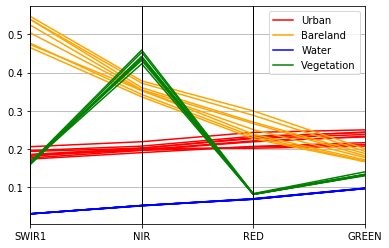

In [43]:
Result = URBan.append([BAReland, WATer, VEGetation])
plot = pd.plotting.parallel_coordinates(Result, "Label", color = ["red", "orange", "blue", "green"])
fig = plot.get_figure()
# fig.savefig('Parallel_Coordinate_6543.jpg', format='jpg', dpi=1200)